### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [57]:
#Create a crosstab between the product `category` and the `isBestSeller` status.
ca_bs_table = pd.crosstab(df['category'],df['isBestSeller'])
ca_bs_table

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [62]:
#calculate the best seller proportion

best_seler_proportion=ca_bs_table[True]/(ca_bs_table[True]+ca_bs_table[False])
best_seler_proportion

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Length: 296, dtype: float64

In [70]:
best_seller_proportions_sorted = best_seler_proportion.sort_values(ascending=False)
top_seller_10= best_seller_proportions_sorted.head(10)
top_seller_10

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
dtype: float64

In [64]:
from scipy.stats import chi2_contingency
import numpy as np
#apply Chi2 on the crosstab table 

chi2_Statistics, p_Value,_, _ = chi2_contingency(ca_bs_table)
chi2_Statistics, p_Value


(36540.20270061387, 0.0)

**it's less than 5**, then there is a relationship between the 2 variables. 

In [66]:
from scipy.stats.contingency import association
association(ca_bs_table, method='cramer')

0.1222829439760564

There is a weak association


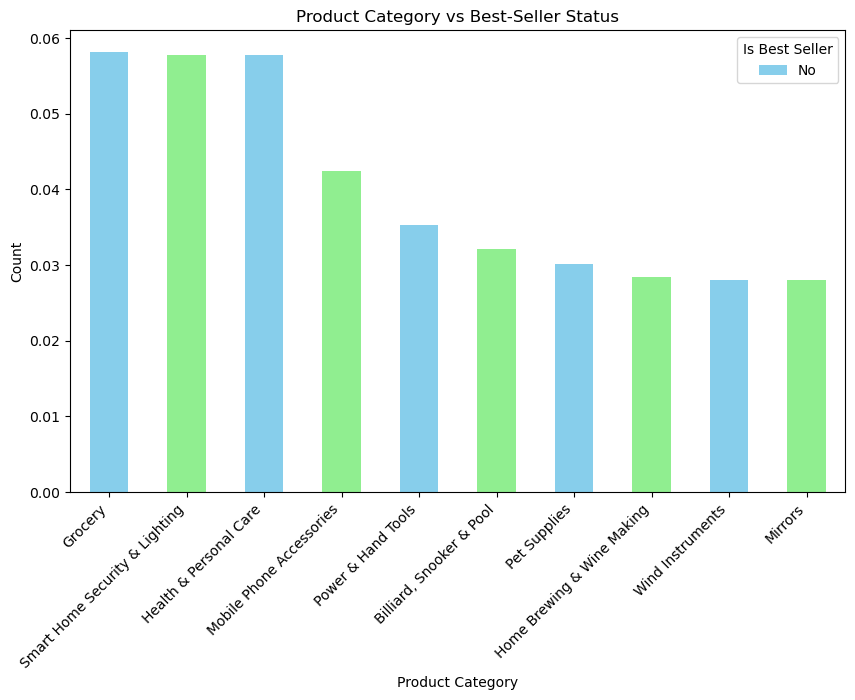

In [71]:
# Plot the stacked bar chart
top_seller_10.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Product Category vs Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Is Best Seller', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.show()


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---


In [72]:
# remove the outliers
# to do this we apply Q1 and Q2
Q1= df['price'].quantile(0.25)
Q3= df['price'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_filtered = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]



### violin plots 


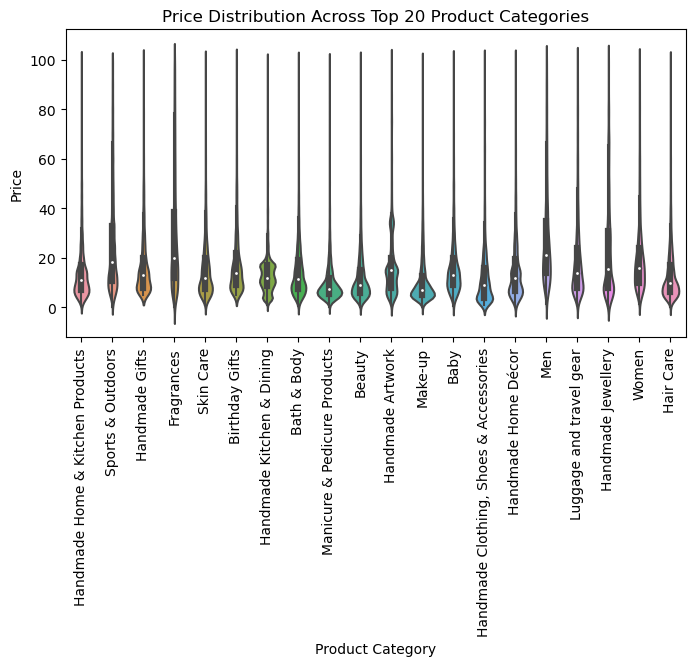

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 20 categories based on count
top_categories = df_filtered['category'].value_counts().nlargest(20).index
df_top_categories = df_filtered[df_filtered['category'].isin(top_categories)]

# Violin plot
plt.figure(figsize=(8, 4))
sns.violinplot(x='category', y='price', data=df_top_categories)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()


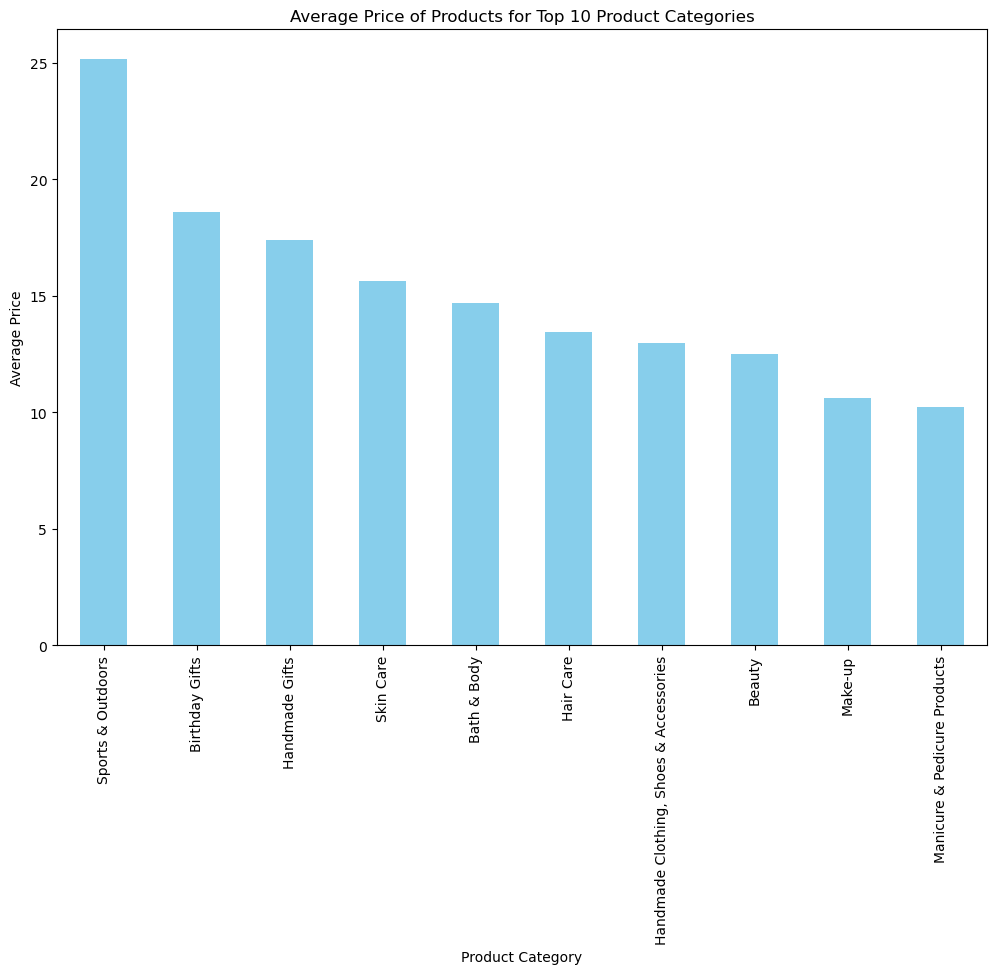

In [78]:
# Filter top 10 categories based on count
top_10_categories = df_filtered['category'].value_counts().nlargest(10).index
df_top_10_categories = df_filtered[df_filtered['category'].isin(top_10_categories)]

# Calculate average price for top 10 categories
avg_price_per_category = df_top_10_categories.groupby('category')['price'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12, 8))
avg_price_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

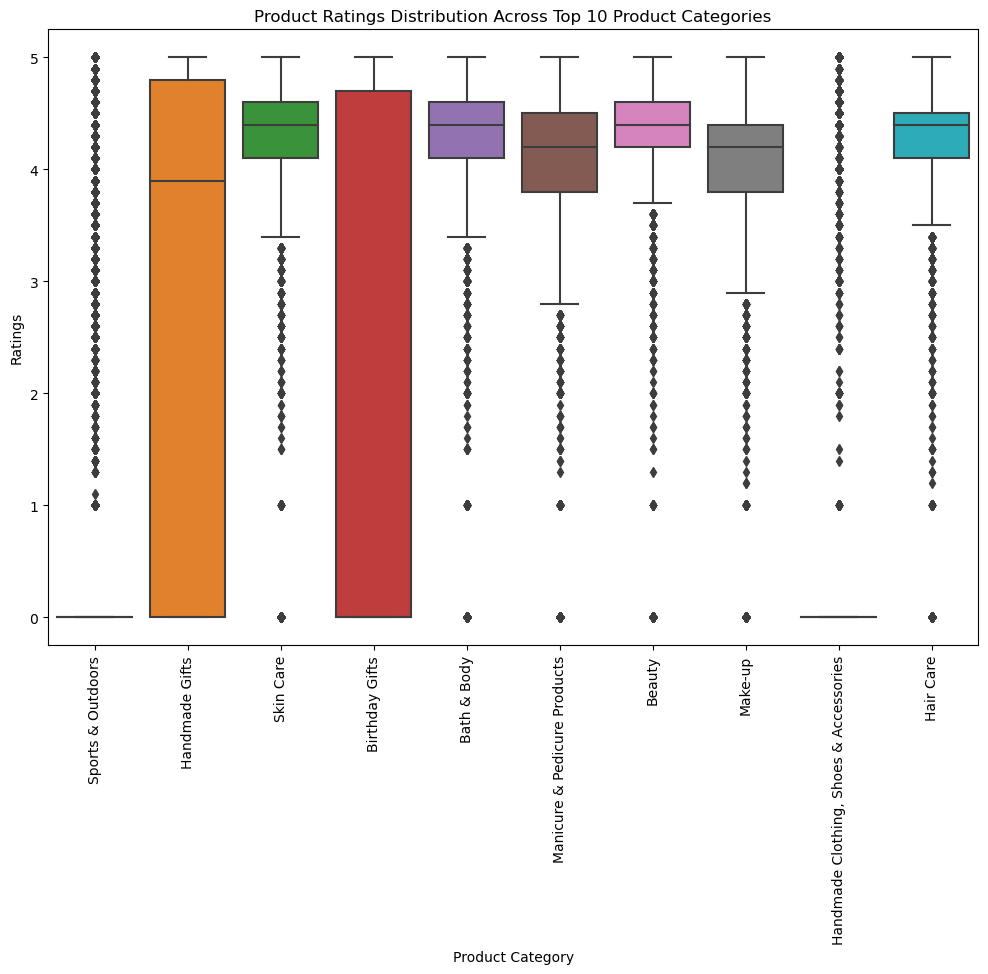

In [77]:

# Filter top 10 categories based on count
df_top_10_categories = df_filtered[df_filtered['category'].isin(top_10_categories)]

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10_categories)
plt.xticks(rotation=90)
plt.title('Product Ratings Distribution Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.show()

### Part 3: Investigating the Interplay Between Product Prices and Ratings
**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?

Step 1: Correlation Coefficients


In [87]:
# Calculate the correlation coefficient between price and stars
correlation = df_filtered['price'].corr(df_filtered['stars'])
print(f"Correlation coefficient between price and stars: {correlation}")


Correlation coefficient between price and stars: -0.07767299878181352


Step 2: Visualizations


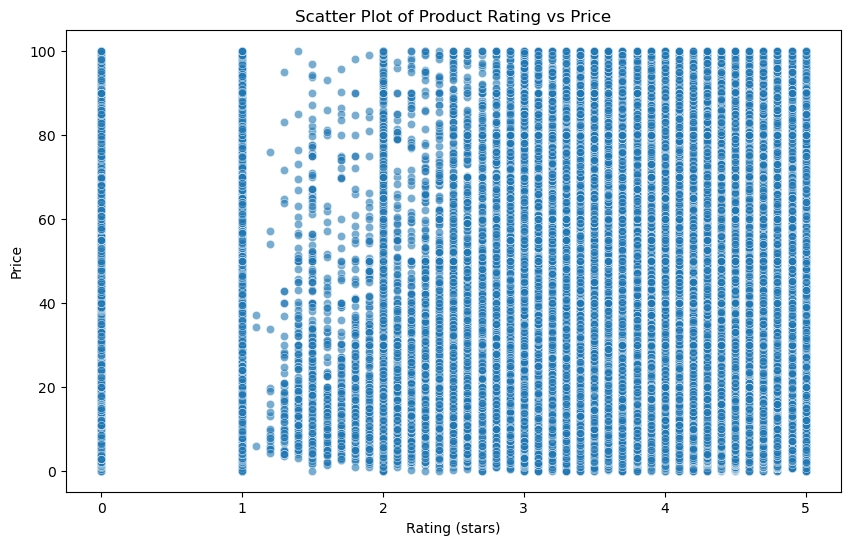

In [86]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df_filtered, alpha=0.6)
plt.title('Scatter Plot of Product Rating vs Price')
plt.xlabel('Rating (stars)')
plt.ylabel('Price')
plt.show()

corleation heatmap 

In [95]:
correlation_matrix = df_filtered[['price', 'stars', 'reviews']].corr()


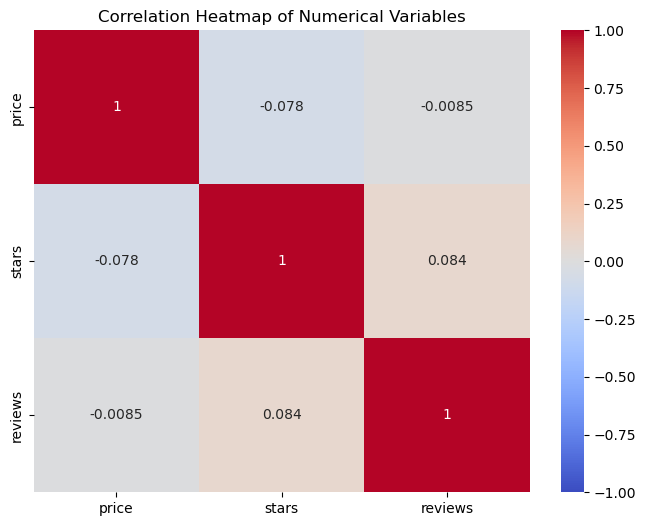

In [96]:



# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

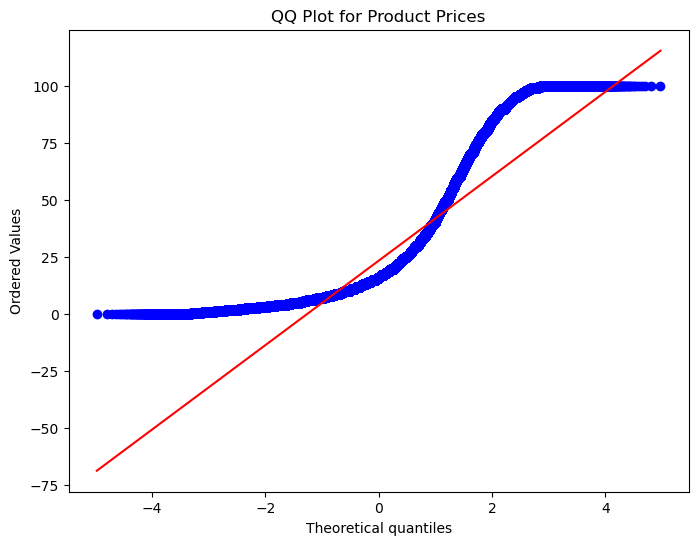

In [98]:
import scipy.stats as stats
# QQ plot for price
plt.figure(figsize=(8, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()